<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/%D0%94%D0%97_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_3_%D0%B8%D1%80%D1%8D%D0%BA_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание изображений из набора данных CIFAR-10 с помощью свёрточный нейронных сетей



#Подготовка данных
Подключение библиотек

In [0]:
%tensorflow_version 1.x
from keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточный сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils #Используем дял to_categoricall
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.optimizers import Adam, RMSprop

Загрузка данных

In [0]:
#Загружаем все базы
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

#задаём заранее batch_size для сетей
batch_size = 128
#Загружаем названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

#Превращаем выходы сетей в формат  one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)


170500096/170498071 [==============================] - 6s 0us/step


Отображение картинки на выбор

самолет


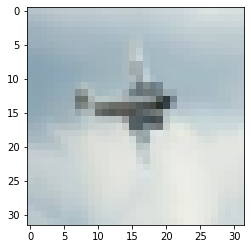

In [0]:
#Выводим для примера картинку
n = 3979
#Загружаем картинку из массива и отрисовываем в цветном формате - RGBA
print(classes[np.argmax(y_train10[n])])
plt.imshow(Image.fromarray(x_train10[n]).convert('RGBA'))
plt.show()

In [0]:
#Выводим пример картинки в цифрах, как она хранится в памяти
print(x_train10[n, 0, 0])

[181 195 202]


In [0]:
print(x_train10.shape)
print(x_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#Нейронные сети
**1** Создаём мощьную свёрточную сетку и

**8** Нейронная сеть с 5 блоками , блок добавляем в начале сетки первый слой 2048 нейронов

Train on 40000 samples, validate on 10000 samples
Epoch 1/27
40000/40000 [==============================] - 222s 6ms/sample - loss: 1.7073 - acc: 0.3652 - val_loss: 1.4683 - val_acc: 0.4822
Epoch 2/27
40000/40000 [==============================] - 218s 5ms/sample - loss: 1.2230 - acc: 0.5626 - val_loss: 1.2070 - val_acc: 0.5834
Epoch 3/27
40000/40000 [==============================] - 218s 5ms/sample - loss: 0.9579 - acc: 0.6671 - val_loss: 0.8346 - val_acc: 0.7095
Epoch 4/27
40000/40000 [==============================] - 217s 5ms/sample - loss: 0.7981 - acc: 0.7295 - val_loss: 0.8844 - val_acc: 0.7104
Epoch 5/27
40000/40000 [==============================] - 217s 5ms/sample - loss: 0.6874 - acc: 0.7711 - val_loss: 0.7100 - val_acc: 0.7560
Epoch 6/27
40000/40000 [==============================] - 217s 5ms/sample - loss: 0.5887 - acc: 0.8046 - val_loss: 0.6274 - val_acc: 0.7857
Epoch 7/27
40000/40000 [==============================] - 217s 5ms/sample - loss: 0.5242 - acc: 0.8270 - val_l

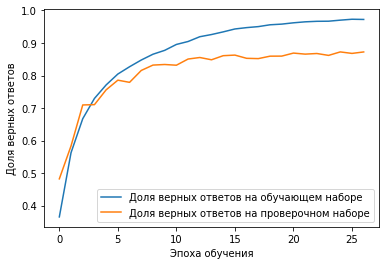

In [0]:
model = Sequential()

#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D( 2048, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D( 1024, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Добавочный сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
#второй добавочный сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#добавочный слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Седьмой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Восьмой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Десятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Одинацатый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый слой подвыборки
#model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.35))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=27,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 221s 6ms/sample - loss: 0.0884 - acc: 0.9729 - val_loss: 0.6277 - val_acc: 0.8625
Epoch 2/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0873 - acc: 0.9736 - val_loss: 0.5246 - val_acc: 0.8715
Epoch 3/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0755 - acc: 0.9762 - val_loss: 0.6568 - val_acc: 0.8671
Epoch 4/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0769 - acc: 0.9768 - val_loss: 0.5836 - val_acc: 0.8792
Epoch 5/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0733 - acc: 0.9771 - val_loss: 0.6362 - val_acc: 0.8643


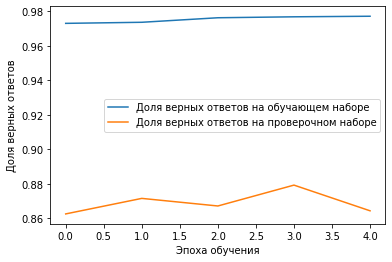

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-3), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 220s 6ms/sample - loss: 0.0553 - acc: 0.9833 - val_loss: 0.5730 - val_acc: 0.8800
Epoch 2/2
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0473 - acc: 0.9848 - val_loss: 0.5642 - val_acc: 0.8827


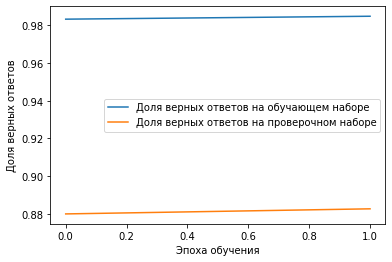

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=2,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 220s 6ms/sample - loss: 0.0399 - acc: 0.9874 - val_loss: 0.5674 - val_acc: 0.8834
Epoch 2/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0385 - acc: 0.9877 - val_loss: 0.5652 - val_acc: 0.8840
Epoch 3/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0344 - acc: 0.9892 - val_loss: 0.5649 - val_acc: 0.8853
Epoch 4/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0334 - acc: 0.9893 - val_loss: 0.5638 - val_acc: 0.8858
Epoch 5/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0289 - acc: 0.9909 - val_loss: 0.5662 - val_acc: 0.8855


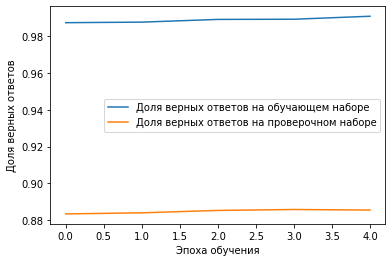

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 220s 6ms/sample - loss: 0.0282 - acc: 0.9909 - val_loss: 0.5755 - val_acc: 0.8873
Epoch 2/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0283 - acc: 0.9907 - val_loss: 0.5783 - val_acc: 0.8871
Epoch 3/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0266 - acc: 0.9918 - val_loss: 0.5756 - val_acc: 0.8880
Epoch 4/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0271 - acc: 0.9916 - val_loss: 0.5802 - val_acc: 0.8891
Epoch 5/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0252 - acc: 0.9919 - val_loss: 0.5811 - val_acc: 0.8887


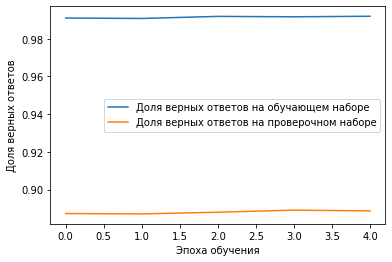

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 221s 6ms/sample - loss: 0.0238 - acc: 0.9921 - val_loss: 0.5876 - val_acc: 0.8898
Epoch 2/10
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0241 - acc: 0.9926 - val_loss: 0.5905 - val_acc: 0.8904
Epoch 3/10
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0231 - acc: 0.9923 - val_loss: 0.5896 - val_acc: 0.8905
Epoch 4/10
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0206 - acc: 0.9934 - val_loss: 0.5930 - val_acc: 0.8908
Epoch 5/10
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0207 - acc: 0.9932 - val_loss: 0.5941 - val_acc: 0.8902
Epoch 6/10
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0183 - acc: 0.9937 - val_loss: 0.5960 - val_acc: 0.8911
Epoch 7/10
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0185 - acc: 0.9939 - val_l

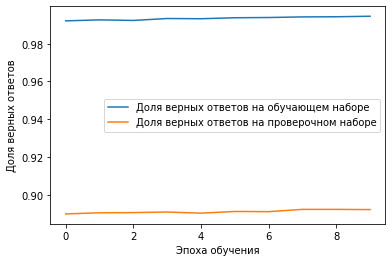

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 222s 6ms/sample - loss: 0.0173 - acc: 0.9942 - val_loss: 0.6074 - val_acc: 0.8918
Epoch 2/5
40000/40000 [==============================] - 221s 6ms/sample - loss: 0.0163 - acc: 0.9948 - val_loss: 0.6097 - val_acc: 0.8916
Epoch 3/5
40000/40000 [==============================] - 220s 5ms/sample - loss: 0.0179 - acc: 0.9946 - val_loss: 0.6093 - val_acc: 0.8921
Epoch 4/5
40000/40000 [==============================] - 219s 5ms/sample - loss: 0.0167 - acc: 0.9948 - val_loss: 0.6089 - val_acc: 0.8921
Epoch 5/5
40000/40000 [==============================] - 220s 6ms/sample - loss: 0.0156 - acc: 0.9946 - val_loss: 0.6106 - val_acc: 0.8918


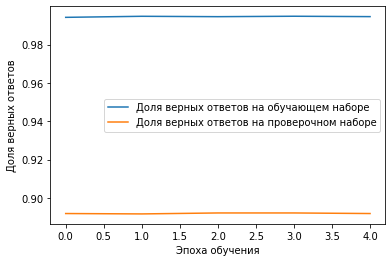

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-6), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 230s 6ms/sample - loss: 0.0157 - acc: 0.9952 - val_loss: 0.6235 - val_acc: 0.8923
Epoch 2/5
40000/40000 [==============================] - 234s 6ms/sample - loss: 0.0149 - acc: 0.9952 - val_loss: 0.6319 - val_acc: 0.8925
Epoch 3/5
40000/40000 [==============================] - 236s 6ms/sample - loss: 0.0152 - acc: 0.9954 - val_loss: 0.6374 - val_acc: 0.8922
Epoch 4/5
40000/40000 [==============================] - 238s 6ms/sample - loss: 0.0166 - acc: 0.9948 - val_loss: 0.6346 - val_acc: 0.8924
Epoch 5/5
40000/40000 [==============================] - 233s 6ms/sample - loss: 0.0170 - acc: 0.9947 - val_loss: 0.6359 - val_acc: 0.8927


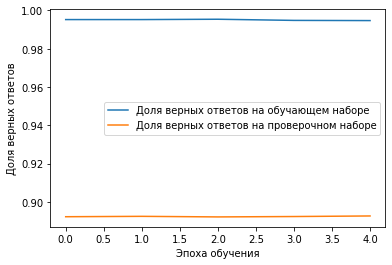

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 281s 7ms/sample - loss: 0.0142 - acc: 0.9954 - val_loss: 0.6450 - val_acc: 0.8932
Epoch 2/10
40000/40000 [==============================] - 258s 6ms/sample - loss: 0.0151 - acc: 0.9951 - val_loss: 0.6482 - val_acc: 0.8924
Epoch 3/10
40000/40000 [==============================] - 256s 6ms/sample - loss: 0.0142 - acc: 0.9955 - val_loss: 0.6449 - val_acc: 0.8933
Epoch 4/10
40000/40000 [==============================] - 250s 6ms/sample - loss: 0.0123 - acc: 0.9958 - val_loss: 0.6510 - val_acc: 0.8937
Epoch 5/10
40000/40000 [==============================] - 263s 7ms/sample - loss: 0.0154 - acc: 0.9954 - val_loss: 0.6469 - val_acc: 0.8942
Epoch 6/10
40000/40000 [==============================] - 275s 7ms/sample - loss: 0.0136 - acc: 0.9956 - val_loss: 0.6488 - val_acc: 0.8935
Epoch 7/10
40000/40000 [==============================] - 279s 7ms/sample - loss: 0.0114 - acc: 0.9964 - val_l

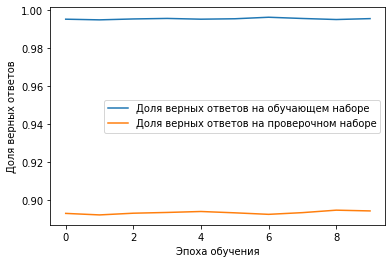

In [0]:
#Перекомпилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-5), metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание случайной картинки из тестового набора

In [0]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

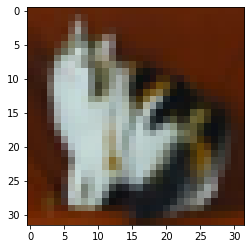

IndexError: ignored

In [0]:
#Выбираем номер пример
n = 251

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

#Распознаем дополнительные картинки

In [0]:
#Загружаем свою картинку
files.upload()
#Проверяем, что картинка загрузилась
!ls

Saving dog.jpg to dog (1).jpg
'4 сам.png'  'dog (1).jpg'   dog.jpg   sample_data   ди.jpg


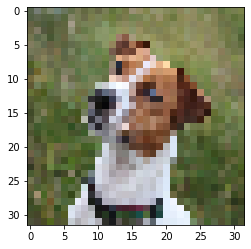

In [0]:
#Вводим адрес картинки
img_path = 'dog (1).jpg'
#Загружаем картинку в массив
img = image.load_img(img_path, target_size=(32, 32))
#Отрисовываем картинку
plt.imshow(img)
plt.show()

In [0]:
#переводим картинку в массив
x = image.img_to_array(img)
#Добавляем одну размерность для предсказания
x = np.expand_dims(x, axis=0)
#Распознаём класс картинки
prediction = model.predict(x)
prediction = np.argmax(prediction)
#Вводим результаты на экран
print("Распознанный образ: ", prediction)
print("Название распознанного образа: ", classes[prediction])

Распознанный образ:  5
Название распознанного образа:  собака
